# Session 4 : Supervised learning (3/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [10]:
from datasets import *


## Support Vector Machine

### Toy dataset

In [11]:
# Create a dataset of 300 points with make_forge()
# and split it into a 270 points training set and 
# 30 points test set.
from sklearn.model_selection import train_test_split
X,y=make_forge(n_points=300)

# Add your code HERE
X_train,X_test=train_test_split(X,random_state = 0,train_size=270)
y_train,y_test=train_test_split(y,random_state = 0,train_size=270)

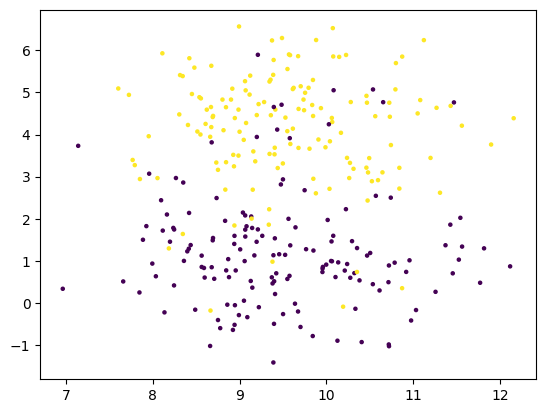

In [9]:
# Print the training points on a 2d figure. Points with
# class 1 should have the color 'salmon' and points with
# the class 0 should have the color 'lightblue'.

# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()
# Print the test points on the same figure with color
# 'orange' for class 1 and 'blue' for class 0.

# YOUR CODE HERE

Score 0.9333333333333333
47 support vectors 0
47 support vectors 1


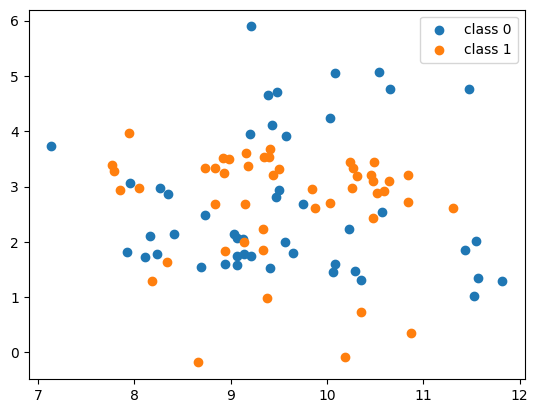

In [12]:
# Create a SVM model for classification with SVC class.
# Use a linear kernel. Train it and evaluate its accuracy
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)
print("Score", model.score(X_test, y_test))

# how many support vectors have been found for each class ?
print( model.n_support_[0], "support vectors 0")
print( model.n_support_[1], "support vectors 1")

# Print them
plt.scatter(
    model.support_vectors_[:model.n_support_[1], 0],
    model.support_vectors_[:model.n_support_[1], 1], label="class 0")
plt.scatter(
    model.support_vectors_[model.n_support_[1]:, 0],
    model.support_vectors_[model.n_support_[1]:, 1], label="class 1")
    
plt.legend()
plt.show()

# How many support vectors have been found for each class ?
# Print them.

<Figure size 640x480 with 0 Axes>

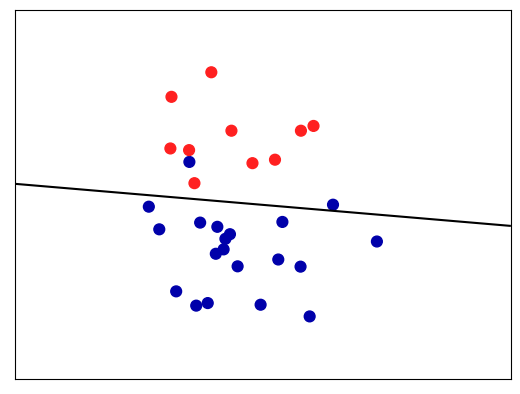

2   30


In [14]:
%run plots.py
figure = plt.figure()

# Visualize the decision boundary of your SVM. How many 
# points are misclassified ? Is your dataset linearly 
# separable ? Do you think it would be possible to improve 
# the accuracy of the model ? Explain why.

plot_2d_separator(model, X_test, y_test)
plt.show()

missedPoint = sum(model.predict(X_test) != y_test)
print(missedPoint," ",len(X_test))

Penalty:  100
  Train score = 0.8888888888888888
  Test  score = 0.9333333333333333


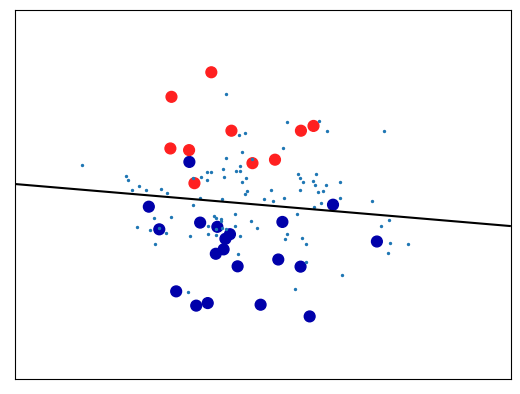

Penalty:  10
  Train score = 0.8888888888888888
  Test  score = 0.9333333333333333


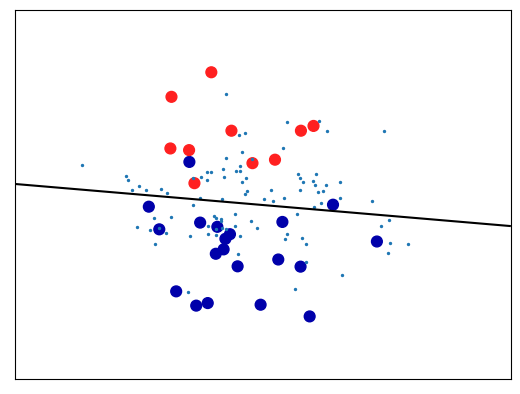

Penalty:  0.1
  Train score = 0.8888888888888888
  Test  score = 0.9333333333333333


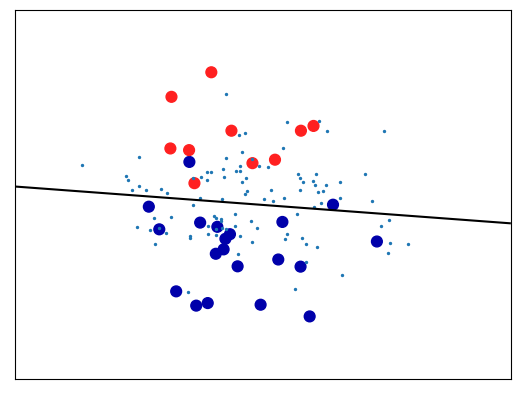

Penalty:  0.01
  Train score = 0.8814814814814815
  Test  score = 0.9666666666666667


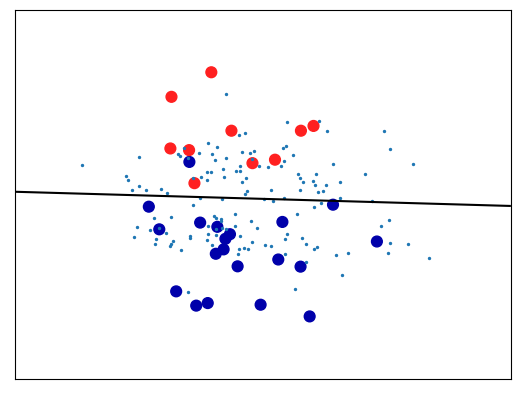

Penalty:  0.001
  Train score = 0.8851851851851852
  Test  score = 0.9666666666666667


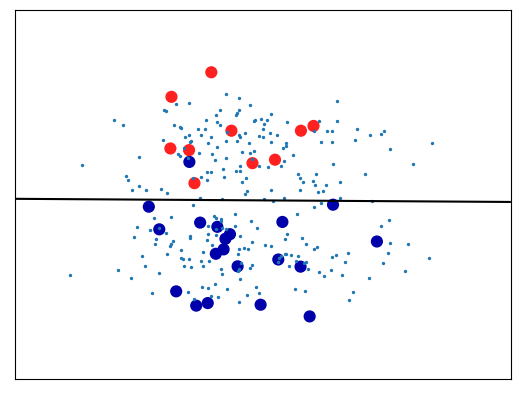

In [16]:
# Train 5 other SVM with a modified value for the penalty
# and plot the decision boundary for each one.
# Explain the effect of this parameter (what happens if we 
# increase/decrease it ?)
# Do you think it can help to prevent underfitting or 
# overfitting ?
penalty=100
model = SVC(kernel="linear", C=penalty)
model.fit(X_train, y_train)
print("Penalty: ",penalty)
print("  Train score =", model.score(X_train, y_train))
print("  Test  score =", model.score(X_test, y_test))
plot_2d_separator(model, X_test, y_test)
plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1], s=2)
plt.show()

penalty=10
model = SVC(kernel="linear", C=penalty)
model.fit(X_train, y_train)
print("Penalty: ",penalty)
print("  Train score =", model.score(X_train, y_train))
print("  Test  score =", model.score(X_test, y_test))
plot_2d_separator(model, X_test, y_test)
plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1], s=2)
plt.show()

penalty=0.1
model = SVC(kernel="linear", C=penalty)
model.fit(X_train, y_train)
print("Penalty: ",penalty)
print("  Train score =", model.score(X_train, y_train))
print("  Test  score =", model.score(X_test, y_test))
plot_2d_separator(model, X_test, y_test)
plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1], s=2)
plt.show()

penalty=0.01
model = SVC(kernel="linear", C=penalty)
model.fit(X_train, y_train)
print("Penalty: ",penalty)
print("  Train score =", model.score(X_train, y_train))
print("  Test  score =", model.score(X_test, y_test))
plot_2d_separator(model, X_test, y_test)
plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1], s=2)
plt.show()

penalty=0.001
model = SVC(kernel="linear", C=penalty)
model.fit(X_train, y_train)
print("Penalty: ",penalty)
print("  Train score =", model.score(X_train, y_train))
print("  Test  score =", model.score(X_test, y_test))
plot_2d_separator(model, X_test, y_test)
plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1], s=2)
plt.show()


### Real case dataset

In [19]:
# Load the breast cancer dataset and train a linear SVC
# model on this dataset. You can create several models and
# adjust the value of the penalty parameter to find the
# optimal one. Can you get a better accuracy than the KNN
# model (it was 0.923?)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

modelCancer = SVC(kernel="linear", C=100, random_state=0)
modelCancer.fit(X_train, y_train)
print("Train score:", modelCancer.score(X_train, y_train))
print("Test  score:", modelCancer.score(X_test, y_test))

Train score: 0.9694835680751174
Test  score: 0.958041958041958
